# <center> Проект: Предсказание рейтинга отеля

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

In [96]:
hotels = pd.read_csv('hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [97]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

# Преобразование данных

In [113]:
# Преобразуем столбец с датой в формат datatime.
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

KeyError: 'review_date'

In [100]:
def get_years_since_review(arg):
    # Функция возвращает количество лет с момента оставления отзыва
    days = float(arg.split(' ')[0]) # Входящий аргумент разделяется на элементы и сохраняется первый элемент
    return round((days/365), 1) # 

# Создаем новый признак, применяя функцию к существующему столбцу 
hotels['years_since_review'] = hotels['days_since_review'].apply(get_years_since_review)
# Удаляем ненужные столбцы
hotels = hotels.drop(['days_since_review'], axis=1)
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,lat,lng,years_since_review
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",51.507894,-0.143671,1.5
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",51.521009,-0.123097,0.6
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",48.845377,2.325643,0.8


In [101]:
# Разделяем столбец с тэгами по элементам
hotels['tags'] = hotels['tags'].str.split(',')
# Разделяем столбец с тэгами по индексам таблицы
hotels = hotels.explode('tags')
# Заменяем в столбце с тегами ненужные элементы на пропуски
hotels['tags'] = hotels['tags'].str.replace('[', '').str.replace('\'', '').str.replace(']', '').str.strip(' ')

C:\Users\maxix\AppData\Local\Temp\ipykernel_16564\3540518122.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  hotels['tags'] = hotels['tags'].str.replace('[', '').str.replace('\'', '').str.replace(']', '').str.strip(' ')


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,lat,lng,years_since_review
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,Leisure trip,51.507894,-0.143671,1.5
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,Couple,51.507894,-0.143671,1.5
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,Studio Suite,51.507894,-0.143671,1.5
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,Stayed 2 nights,51.507894,-0.143671,1.5
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,Submitted from a mobile device,51.507894,-0.143671,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386801,31 Great Cumberland Place Westminster Borough ...,365,2017-05-21,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,6,28,9.2,Stayed 2 nights,51.515125,-0.160066,0.2
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,2016-08-05,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,Leisure trip,51.493109,-0.190208,1.0
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,2016-08-05,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,Couple,51.493109,-0.190208,1.0
386802,25 Courtfield Gardens Kensington and Chelsea L...,222,2016-08-05,9.0,The Nadler Kensington,Australia,Patio outside could have been cleaned of alga...,20,1209,Beds comfortable Pillows also good Homely fee...,20,2,8.8,Bunk Bed Room,51.493109,-0.190208,1.0


In [102]:
# Заполняем пропуски средними значениями
hotels['lat'] = hotels['lat'].fillna(hotels['lat'].mean())
hotels['lng'] = hotels['lng'].fillna(hotels['lng'].mean())

In [103]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['tags']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['tags'])
hotels = pd.concat([hotels, type_bin], axis=1)

In [104]:
bin_encoder = ce.BinaryEncoder(cols=['hotel_name']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, type_bin], axis=1)


In [105]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis=1)


In [106]:
bin_encoder = ce.BinaryEncoder(cols=['review_date']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['review_date'])
hotels = pd.concat([hotels, type_bin], axis=1)


In [107]:
# Удаляем ненужные столбцы
hotels = hotels.drop([
    'hotel_address', 
    'negative_review', 
    'positive_review', 
    'hotel_name', 
    'tags', 
    'reviewer_nationality', 
    'review_date'
    ], axis=1)

# Проверка данных на нормальность

In [108]:
# Проведем тестирование на нормальность с помощью теста Шапиро-Уилка

H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

alpha = 0.05

from scipy.stats import shapiro

_, p = shapiro(hotels)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


c:\Users\maxix\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Исследование зависимостей в данных

<AxesSubplot:>

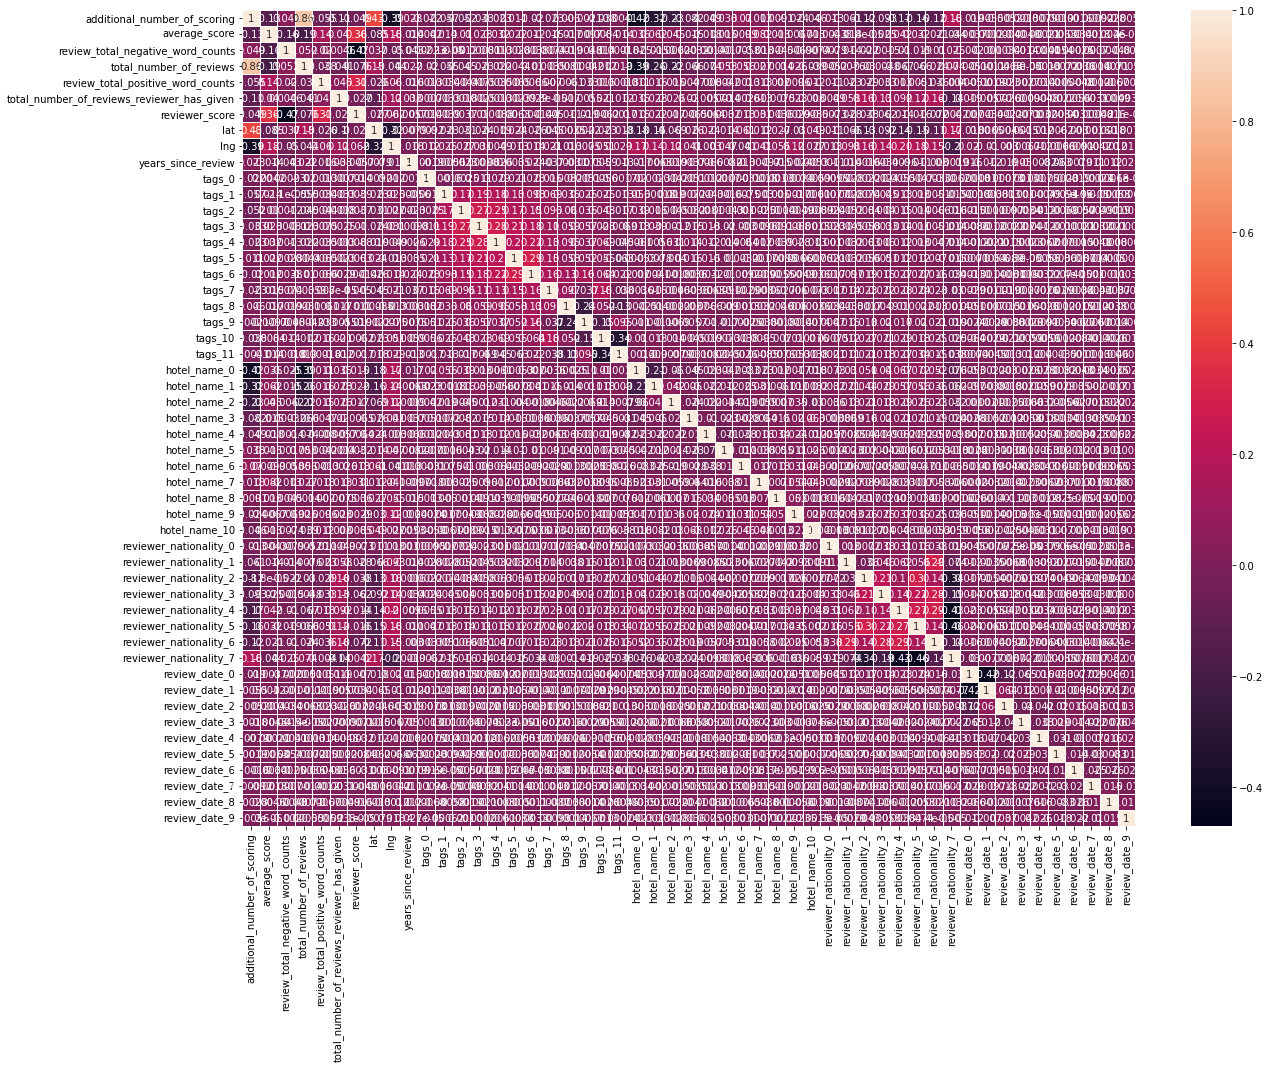

In [109]:
# Проведем корреляционный анализ всего набора данных и отберем только необходимые признаки для предсказания.
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(hotels.corr(method='spearman'), annot=True, linewidths=.5, ax=ax)

In [110]:
# Удаляем ненужные столбцы
hotels = hotels.drop(['additional_number_of_scoring'], axis=1)

<AxesSubplot:>

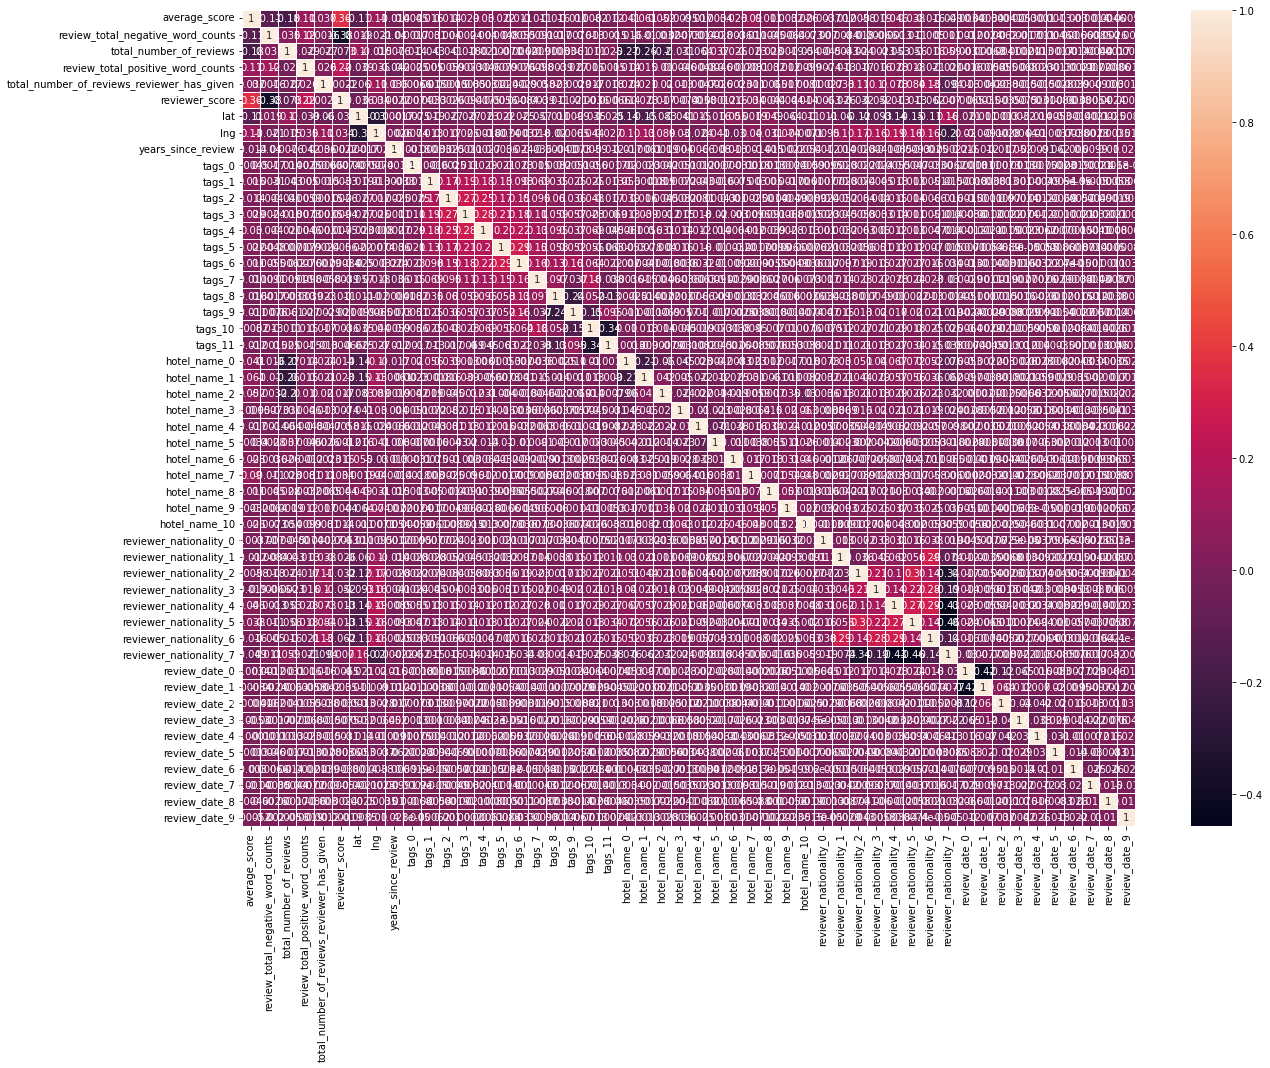

In [111]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(hotels.corr(), annot=True, linewidths=.5, ax=ax)

# Предсказание

In [112]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))
#MAPE: 0.14127635463313404

MAPE: 0.018415953295300113
